In [56]:
## Import packages here
import pandas as pd
import numpy as np 
import imblearn
from matplotlib.pyplot import figure
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix, roc_curve, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn import metrics
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from collections import Counter

In [57]:
# Viewing first 5 data
train = pd.read_csv('dataset__.csv')
test = pd.read_csv('test.csv')
train.head()

,Unnamed: 0,id,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,molecule_smiles,protein_name,binds
0,0,158486468,O=C(Nc1cc(Br)c(F)cc1C(=O)O)OCC1c2ccccc2-c2ccccc21,Cl.Cl.NCc1nc2cnccc2s1,COc1ccc(C)nc1CN.Cl.Cl,COc1ccc(C)nc1CNc1nc(NCc2nc3cnccc3s2)nc(Nc2cc(B...,sEH,0
1,1,115681901,O=C(N[C@H](CC1CCCC1)C(=O)O)OCC1c2ccccc2-c2ccccc21,COC(C)(CN)C1CC1,COc1cccc(-c2cc(N)on2)c1,COc1cccc(-c2cc(Nc3nc(NCC(C)(OC)C4CC4)nc(N[C@H]...,sEH,0
2,2,229726894,O=C(Nc1ncc(Br)cc1C(=O)O)OCC1c2ccccc2-c2ccccc21,Nc1ccc([N+](=O)[O-])c(Br)c1,Br.NCc1cccc(Br)n1,O=C(N[Dy])c1cc(Br)cnc1Nc1nc(NCc2cccc(Br)n2)nc(...,HSA,0
3,3,245464362,O=C(O)C[C@@H](Cc1ccc(Cl)c(Cl)c1)NC(=O)OCC1c2cc...,Cc1c([C@@H]2[C@@H](CN)CC(=O)N2C)cnn1C,COC(=O)c1occc1N,COC(=O)c1occc1Nc1nc(NC[C@H]2CC(=O)N(C)[C@@H]2c...,BRD4,0
4,4,96202681,O=C(N[C@@H](Cc1ccc(Cl)cc1Cl)C(=O)O)OCC1c2ccccc...,Cc1c(N)cccc1Br,N#Cc1cccc(N)n1,Cc1c(Br)cccc1Nc1nc(Nc2cccc(C#N)n2)nc(N[C@@H](C...,HSA,0


In [63]:
# Rows and columns
(train.shape, test.shape)

((4400000, 8), (1674896, 6))

In [64]:
# Info data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4400000 entries, 0 to 4399999
Data columns (total 8 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   Unnamed: 0             int64 
 1   id                     int64 
 2   buildingblock1_smiles  object
 3   buildingblock2_smiles  object
 4   buildingblock3_smiles  object
 5   molecule_smiles        object
 6   protein_name           object
 7   binds                  int64 
dtypes: int64(3), object(5)
memory usage: 268.6+ MB


In [65]:
train.dtypes

Unnamed: 0                int64
id                        int64
buildingblock1_smiles    object
buildingblock2_smiles    object
buildingblock3_smiles    object
molecule_smiles          object
protein_name             object
binds                     int64
dtype: object

In [66]:
test.dtypes

id                        int64
buildingblock1_smiles    object
buildingblock2_smiles    object
buildingblock3_smiles    object
molecule_smiles          object
protein_name             object
dtype: object

In [67]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (4400000, 8) 
The test data size before dropping Id feature is : (1674896, 6) 


In [68]:
# Shuffle the rows
train = train.sample(frac=1).reset_index(drop=True)

In [69]:
train_copy=train.copy()

<Axes: xlabel='binds'>

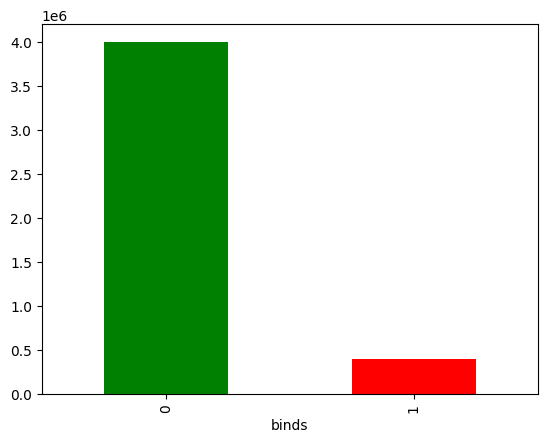

In [70]:
# Visualize the count for each class
train_copy['binds'].value_counts().plot.bar(color=['green', 'red'])

In [71]:
train_copy.isnull().sum()

Unnamed: 0               0
id                       0
buildingblock1_smiles    0
buildingblock2_smiles    0
buildingblock3_smiles    0
molecule_smiles          0
protein_name             0
binds                    0
dtype: int64

In [72]:
test.isnull().sum()

id                       0
buildingblock1_smiles    0
buildingblock2_smiles    0
buildingblock3_smiles    0
molecule_smiles          0
protein_name             0
dtype: int64

In [20]:
# Get a Pd.Series consisting of all the string categoricals
#one_hot_encode_cols = data_copy.dtypes[data_copy.dtypes == 'object']  # filtering by string categoricals
#one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields

#data_copy[one_hot_encode_cols].head().T

In [21]:
# Do the one hot encoding
#data_copy = pd.get_dummies(data_copy, columns=one_hot_encode_cols, drop_first=True)
#data_copy.shape

In [73]:
#join the test and trainset to ensure uniform preprocessing
ntrain = train_copy.shape[0]
ntest = test.shape[0]
y = train_copy[['binds']]
all_data = pd.concat((train_copy, test)).reset_index(drop=True)
all_data.drop(['binds'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (6074896, 7)


In [74]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
le = LabelEncoder()

# Fit the encoder to the entire dataset (flattened)
le.fit(all_data[['buildingblock1_smiles', 'buildingblock2_smiles', 'buildingblock3_smiles', 'protein_name', 'molecule_smiles']].values.reshape(-1, 1))

# Transform each column using the same encoder
all_data['buildingblock1_smiles'] = le.transform(all_data['buildingblock1_smiles'])
all_data['buildingblock2_smiles'] = le.transform(all_data['buildingblock2_smiles'])
all_data['buildingblock3_smiles'] = le.transform(all_data['buildingblock3_smiles'])
all_data['protein_name'] = le.transform(all_data['protein_name'])
all_data['molecule_smiles'] = le.transform(all_data['molecule_smiles'])

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [76]:
all_data.head()

,Unnamed: 0,id,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,molecule_smiles,protein_name
0,823566.0,121524152,4384172,3787106,4141336,4164382,5211052
1,2168058.0,55554619,3247989,4142426,3787122,3241755,3951000
2,3804908.0,227513216,5108190,4142268,4142221,5002470,5211052
3,4018278.0,83623928,4381931,4141389,2278011,2311233,5211052
4,2437376.0,272874863,5108324,3787039,781657,786636,5211052


In [78]:
import seaborn as sns
all_data.drop('Unnamed: 0', axis=1, inplace= True)
#sns.pairplot(data_copy, plot_kws=dict(alpha=.1, edgecolor='none'))

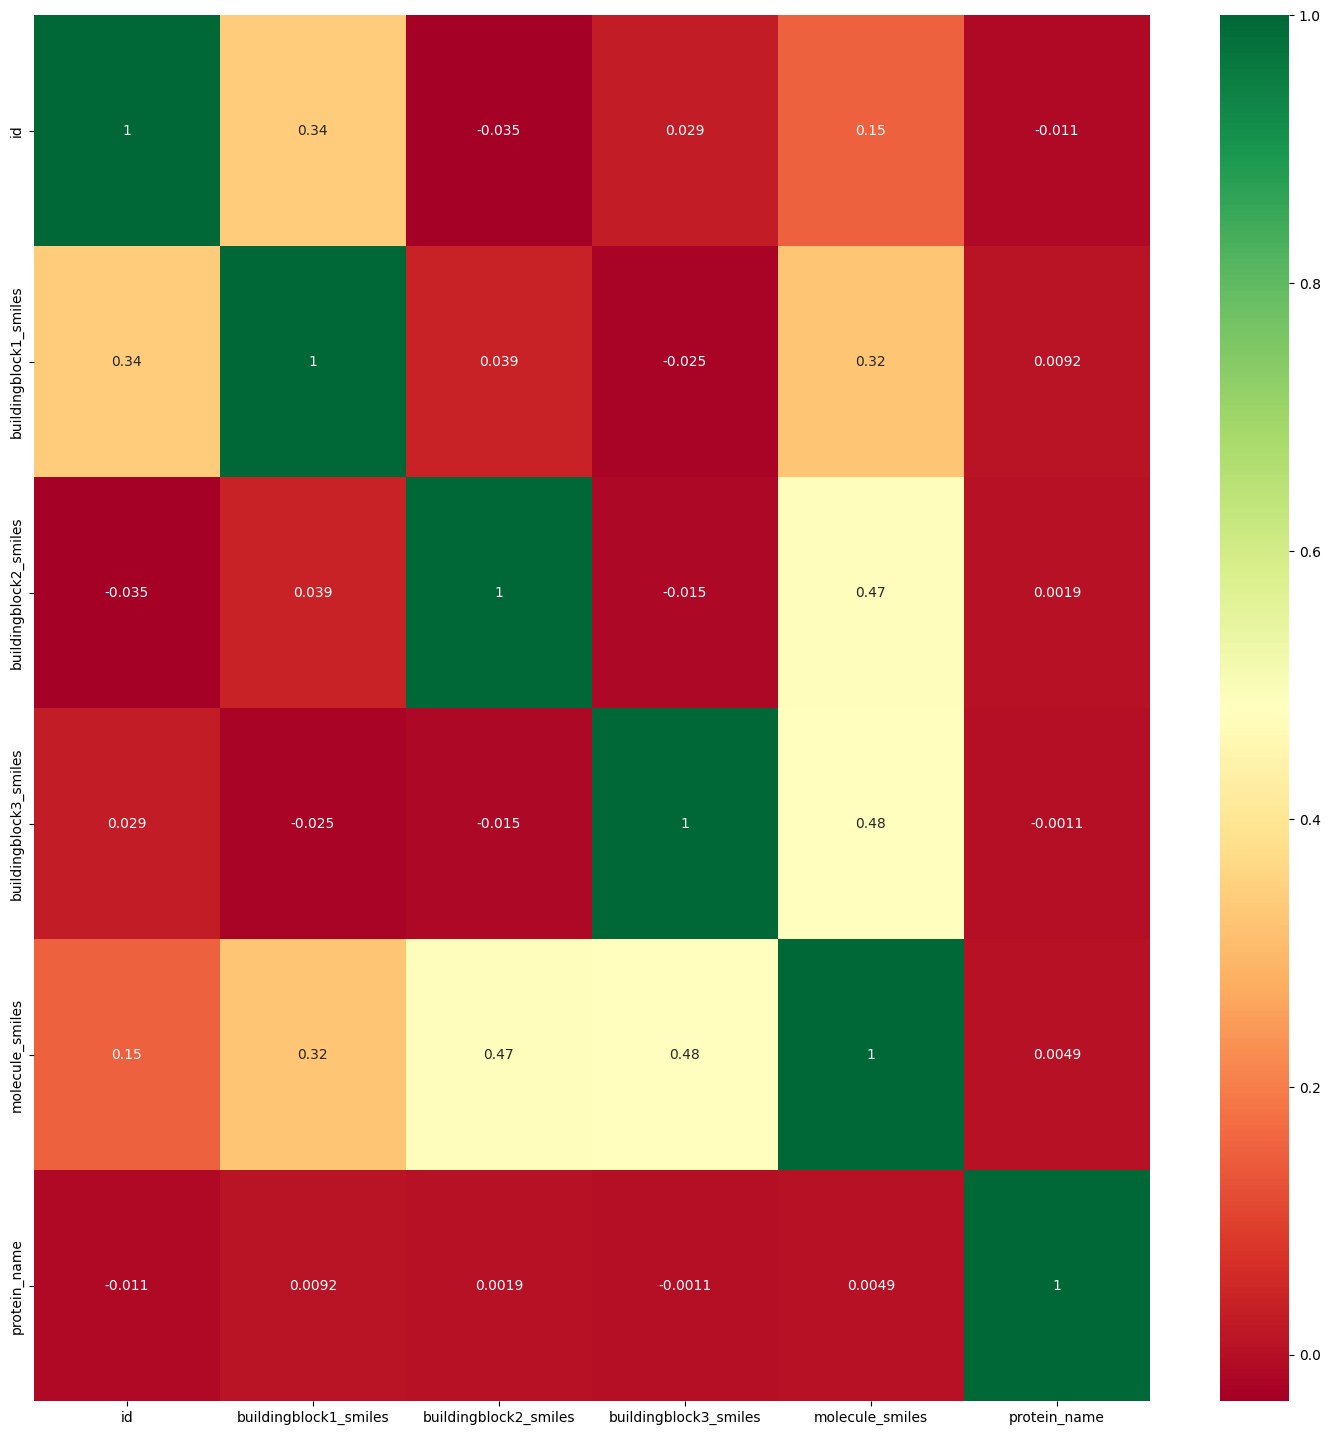

In [79]:
plt.figure(figsize=(18,18))
sns.heatmap(all_data.corr(),annot=True,cmap='RdYlGn')

plt.show()

In [80]:
all_data.columns

Index(['id', 'buildingblock1_smiles', 'buildingblock2_smiles',
       'buildingblock3_smiles', 'molecule_smiles', 'protein_name'],
      dtype='object')

In [81]:
train_ = all_data[:ntrain]
test_ = all_data[ntrain:]

In [90]:
rs=123
# Grid search hyperparameters for a random forest model
def grid_search_rf(X_train, y_train):
    params_grid = { 
        'max_depth': [5, 10, 15, 20], 
        'n_estimators': [25, 50, 100], 
    }
    rf_model = RandomForestClassifier(random_state=rs)
    grid_search = GridSearchCV(estimator = rf_model, param_grid = params_grid, scoring='f1', cv = 2, verbose = 1)
    grid_search.fit(X_train.drop(['id'], axis=1), y_train)
    preds = preds = grid_search.predict(x_test.drop(['id'], axis=1))
    probs = grid_search.predict_proba(x_test.drop(['id'], axis=1))[:, 1]
    submit= grid_search.predict_proba(test_.drop(['id'], axis=1))[:, 1]
    submit_df = pd.DataFrame({'id': test_['id'], 'binds': submit})
    submit_df.to_csv('submit_1_rf.csv')

    
    # Confusion matrix
    cm = confusion_matrix(y_test, preds)
    print('Confusion Matrix - Random Forest:\n', cm)
    
    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, probs)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='Random Forest')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve - Random Forest')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()
    
    # Classification metrics report
    f1 = f1_score(y_test, preds)
    recall = recall_score(y_test, preds)
    precision = precision_score(y_test, preds)
    accuracy = accuracy_score(y_test, preds)
    print('Metrics - Random Forest:')
    print('F1 Score:', f1)
    print('Recall:', recall)
    print('Precision:', precision)
    print('Accuracy:', accuracy)

    # Feature importance
    feature_importances = grid_search.best_estimator_.feature_importances_
    feature_names = X_train.drop(['id'], axis=1).columns
    plt.figure(figsize=(8, 6))
    plt.bar(feature_names, feature_importances)
    plt.title('Feature Importances - Random Forest')
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.xticks(rotation=90)
    plt.show()
    
    

# Grid search hyperparameters for a XGBoost model
def grid_search_xgb(X_train, y_train):
    params_grid = {
        'max_depth': [5, 10, 15, 20],
        'n_estimators': [25, 50, 100],
        'learning_rate': [0.1, 0.5, 1],
    }
    xgb_model = XGBClassifier(random_state=rs)
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=params_grid, scoring='f1', cv=2, verbose=1)
    grid_search.fit(X_train.drop('id', axis=1), y_train)
    preds = grid_search.predict(x_test.drop('id', axis=1))
    probs = grid_search.predict_proba(x_test.drop(['id'], axis=1))[:, 1]
    submit= grid_search.predict_proba(test_.drop(['id'], axis=1))[:, 1]
    submit_df = pd.DataFrame({'id': test_['id'], 'binds': submit})
    submit_df.to_csv('submit_1__xg.csv', index=False)

    # Confusion matrix
    cm = confusion_matrix(y_test, preds)
    print('Confusion Matrix - XGBoost:\n', cm)

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, probs)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='XGBoost')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve - XGBoost')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # Feature importance
    feature_importances = grid_search.best_estimator_.feature_importances_
    feature_names = X_train.drop('id', axis=1).columns
    plt.figure(figsize=(8, 6))
    plt.bar(feature_names, feature_importances)
    plt.title('Feature Importances - XGBoost')
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.xticks(rotation=90)
    plt.show()

     # Classification metrics report
    f1 = f1_score(y_test, preds)
    recall = recall_score(y_test, preds)
    precision = precision_score(y_test, preds)
    accuracy = accuracy_score(y_test, preds)
    print('Metrics - XGBoost:')
    print('F1 Score:', f1)
    print('Recall:', recall)
    print('Precision:', precision)
    print('Accuracy:', accuracy)

In [83]:
def split_data(df, target):
    return train_test_split(df, target, test_size=0.3, stratify=y, random_state = rs)

In [85]:
# Split the training and testing dataset
x_train, x_test, y_train, y_test = split_data(train_, y)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
                ID  PROBABILITY  PREDICTION
308128   258337808     0.002903           0
1436847   88833072     0.016969           0
1790769  220717281     0.027087           0
1222024  119182355     0.017893           0
422778   125880578     0.034699           0
...            ...          ...         ...
2196938  130336102     0.020022           0
754179   218243438     0.003744           0
601282   108881088     0.008613           0
315581    76565334     0.075781           0
502321    53219126     0.109450           0

[660000 rows x 3 columns]
Confusion Matrix - Random Forest:
 [[595742   4258]
 [ 25747  34253]]


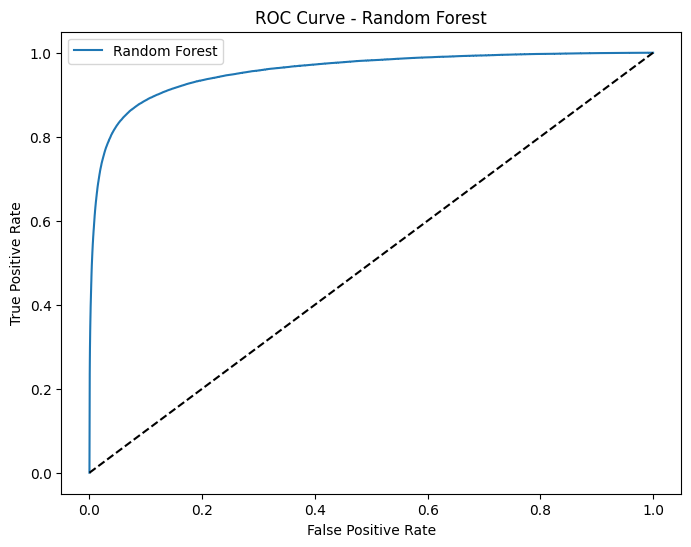

Metrics - Random Forest:
F1 Score: 0.6954147252591081
Recall: 0.5708833333333333
Precision: 0.8894341876347017
Accuracy: 0.9545378787878788


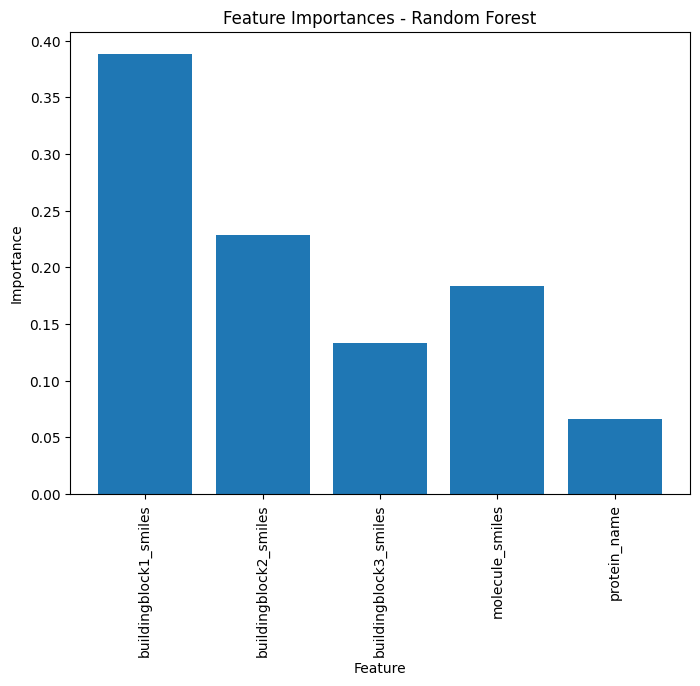

In [31]:
grid_search_rf(x_train, y_train)

Fitting 2 folds for each of 36 candidates, totalling 72 fits
Confusion Matrix - XGBoost:
 [[1183785   16215]
 [  37861   82139]]


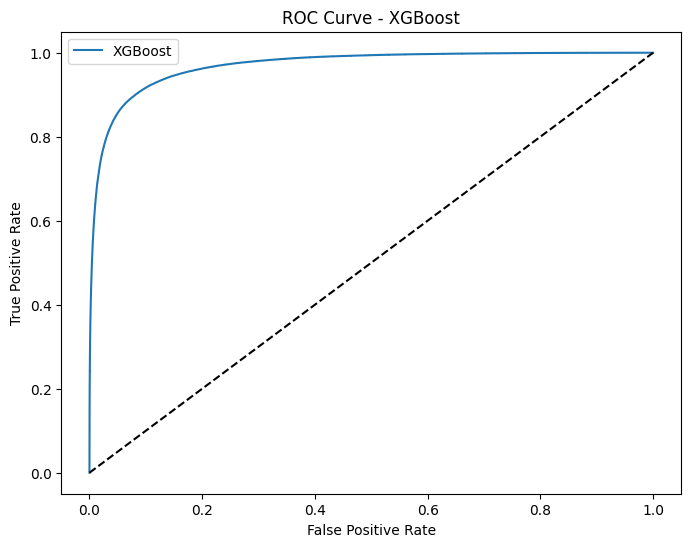

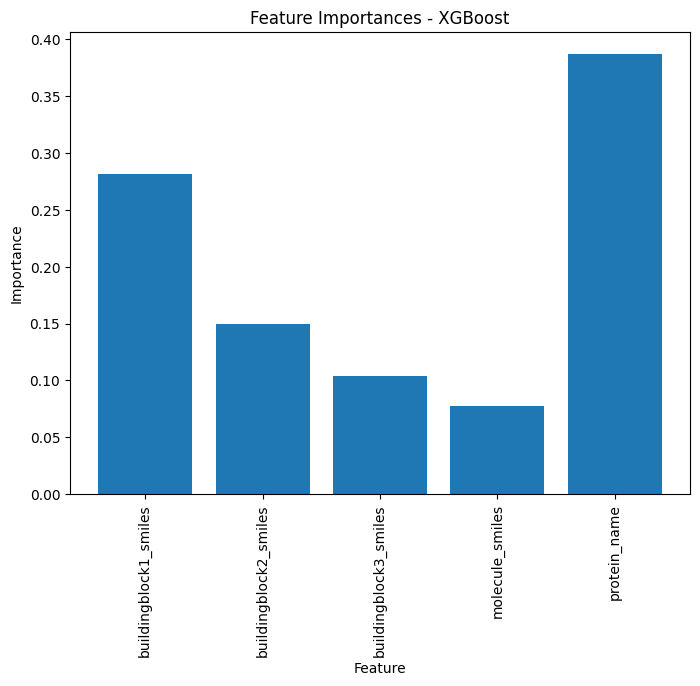

Metrics - XGBoost:
F1 Score: 0.7523471060754555
Recall: 0.6844916666666667
Precision: 0.8351363442259593
Accuracy: 0.9590333333333333


In [91]:
from xgboost import XGBClassifier
grid_search_xgb(x_train, y_train)

In [92]:
pd.read_csv('submit_1__xg.csv').shape

(1674896, 2)